In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


In [2]:
# To import libraries
import pandas as pd #pandas library for data manipulations and data operations
import numpy as np #Numerical python (numpy) library contains basic linear algebra functions Fourier transforms,advanced random number capabilities
import matplotlib.pyplot as plt #this is a plotting based library
import seaborn as sns #data visulization library

In [3]:
# File path
file_path = '/kaggle/input/ue21cs342aa2/train.csv'

# Reading the CSV file
train_data = pd.read_csv(file_path)
train_data1 = pd.read_csv(file_path)
# Displaying the first few rows of the dataset
train_data.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


In [4]:
# 1. Check for Missing Values
missing_values = train_data.isnull().sum()

# 2. Convert 'Date' to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# 3. Set 'Date' as index
train_data.set_index('Date', inplace=True)

# 4. Data Type Check
data_types = train_data.dtypes

missing_values, data_types

(id          0
 Date        0
 Open        0
 Close       0
 Volume      0
 Strategy    0
 dtype: int64,
 id            int64
 Open        float64
 Close       float64
 Volume        int64
 Strategy     object
 dtype: object)

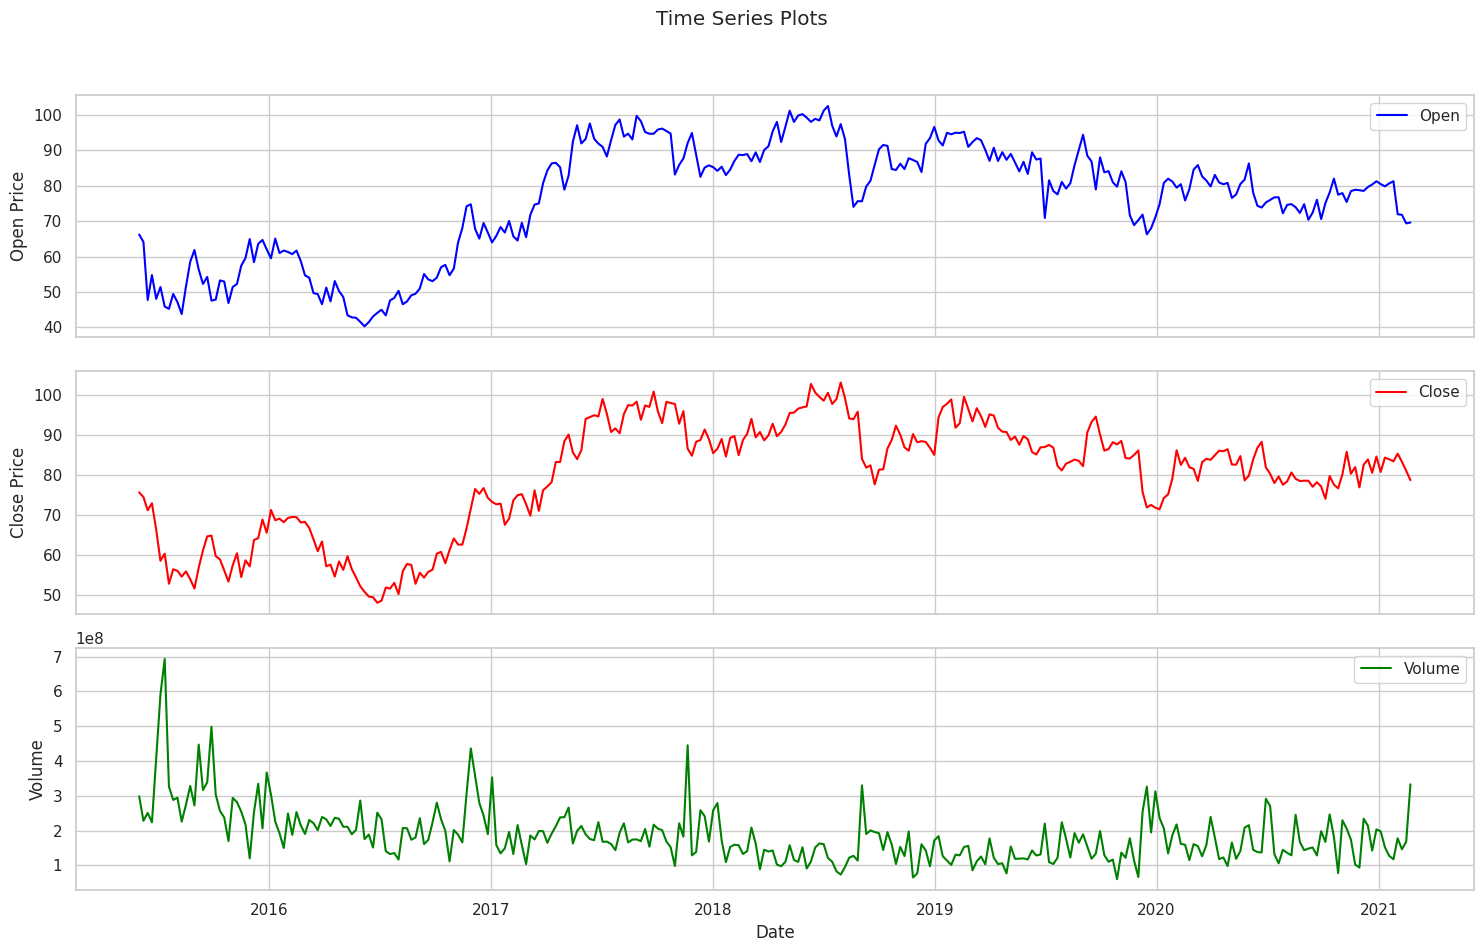

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Time Series Plots')

# Plotting 'Volume'
sns.lineplot(ax=axes[2], x=train_data.index, y='Volume', data=train_data, label='Volume', color='green')
axes[2].set_ylabel('Volume')

# Plotting 'Open' prices
sns.lineplot(ax=axes[0], x=train_data.index, y='Open', data=train_data, label='Open', color='blue')
axes[0].set_ylabel('Open Price')

# Plotting 'Close' prices
sns.lineplot(ax=axes[1], x=train_data.index, y='Close', data=train_data, label='Close', color='red')
axes[1].set_ylabel('Close Price')



# Displaying the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

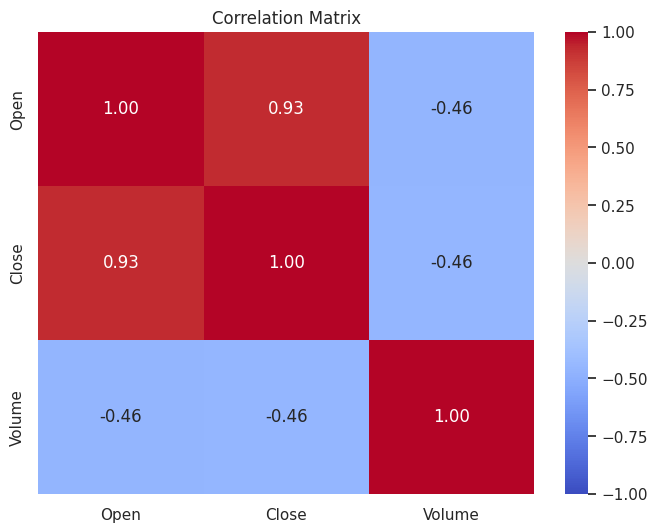

,Open,Close,Volume
Open,1.000000,0.927795,-0.461010
Close,0.927795,1.000000,-0.458788
Volume,-0.461010,-0.458788,1.000000


In [6]:
# Calculating the correlation matrix
correlation_matrix = train_data[['Open', 'Close', 'Volume']].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

This shows us that there is a weak negative correlation between volume, opening and closing price and a strong positive correlation between the opening and closing price.

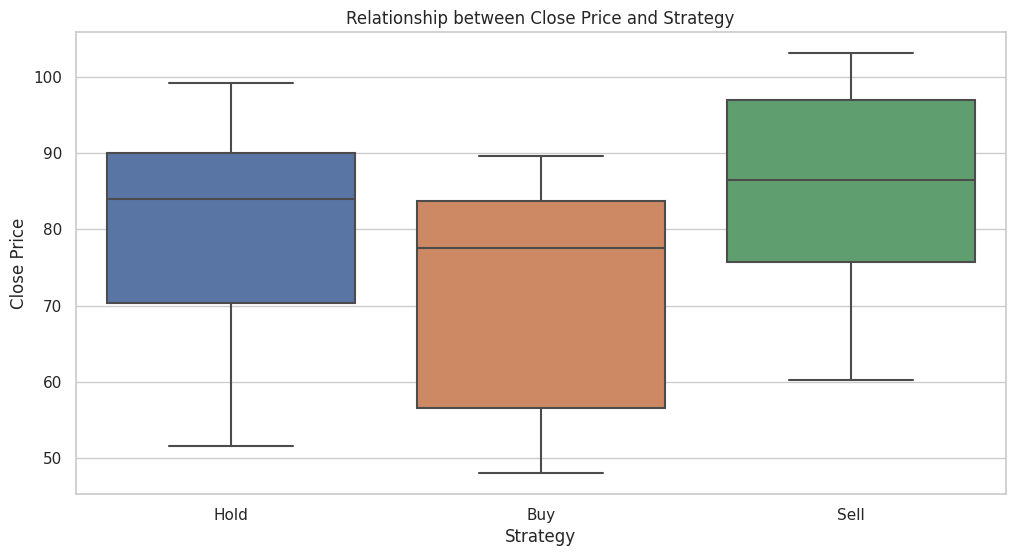

,count,mean,std,min,25%,50%,75%,max
Strategy,,,,,,,,
Buy,78.0,72.199794,13.469731,47.979353,56.588038,77.573843,83.695109,89.580780
Hold,143.0,79.892285,13.098404,51.521815,70.373311,83.936706,90.055107,99.230836
Sell,79.0,85.733749,12.408614,60.264270,75.694463,86.431138,96.937415,103.119373


In [7]:
# Visualize the Relationship between 'Close' price and 'Strategy'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Strategy', y='Close', data=train_data)
plt.title('Relationship between Close Price and Strategy')
plt.ylabel('Close Price')
plt.xlabel('Strategy')
plt.show()

# Statistical Summary of 'Close' price for each 'Strategy'
statistical_summary = train_data.groupby('Strategy')['Close'].describe()
statistical_summary

This shows us that the closing price tends to be higher when the strategy is sell and lower when the strategy is buy

Hold: Used across a wide range of 'Close' prices, but the median is higher than 'Buy' and lower than'Sell'.
Buy: when the 'Close' price is generally low. 
Sell: when the 'Close' price is on the generally high and 

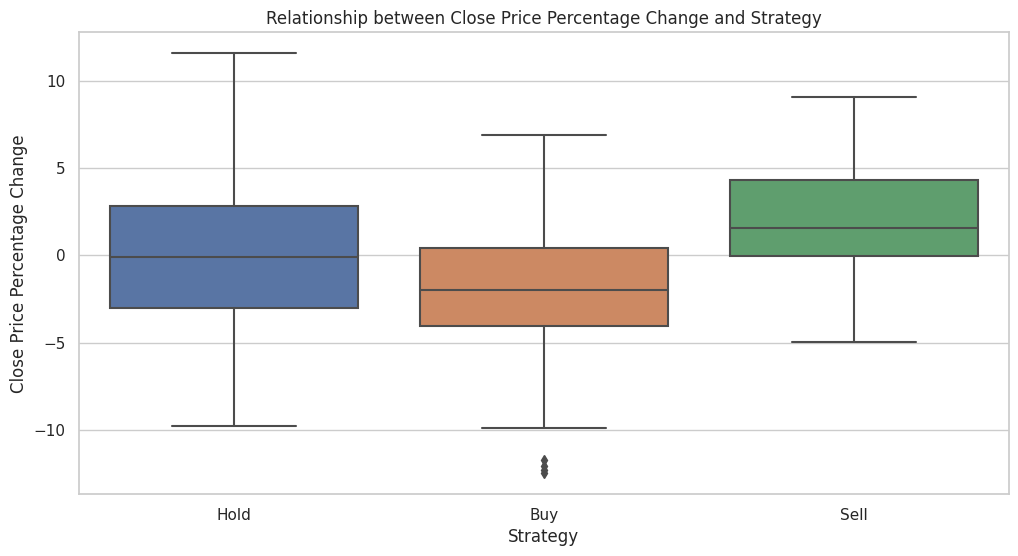

,count,mean,std,min,25%,50%,75%,max
Strategy,,,,,,,,
Buy,78.0,-2.181893,3.962459,-12.495356,-4.036957,-1.987184,0.441370,6.920736
Hold,142.0,0.253360,4.460888,-9.781559,-3.016881,-0.073640,2.839526,11.582661
Sell,79.0,2.098491,3.142944,-4.952383,-0.037139,1.575187,4.314924,9.069333


In [8]:
# 1. Calculate Percentage Change in 'Close' price
train_data['Close_Pct_Change'] = train_data['Close'].pct_change() * 100

# 2. Visualize the Relationship between 'Close' price change and 'Strategy'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Strategy', y='Close_Pct_Change', data=train_data)
plt.title('Relationship between Close Price Percentage Change and Strategy')
plt.ylabel('Close Price Percentage Change')
plt.xlabel('Strategy')
plt.show()

# 3. Statistical Summary of 'Close' price percentage change for each 'Strategy'
statistical_summary_pct_change = train_data.groupby('Strategy')['Close_Pct_Change'].describe()
statistical_summary_pct_change

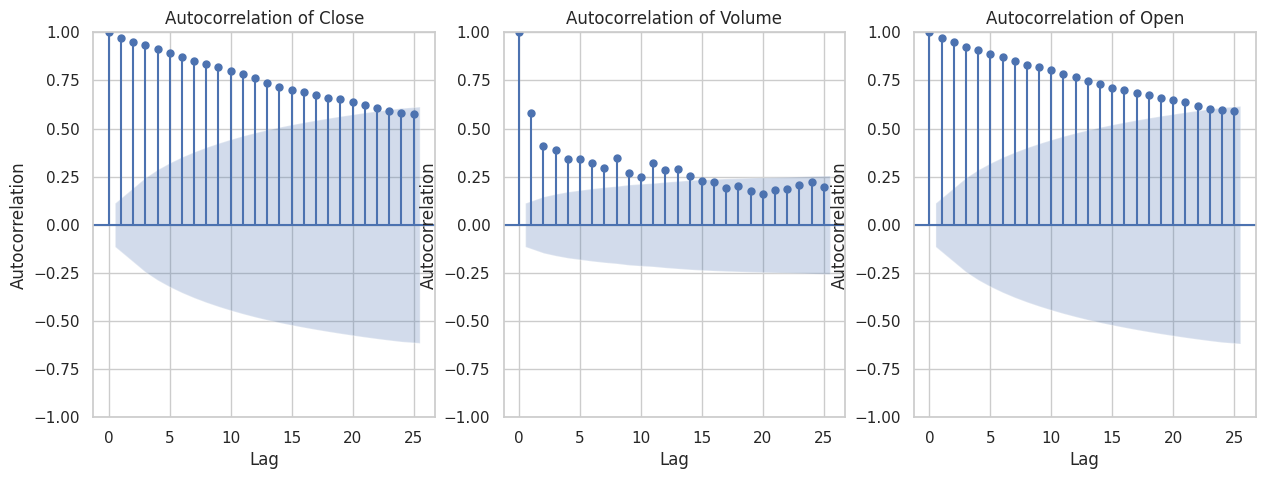

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Setting the figure size for the plots
plt.figure(figsize=(15, 5))

# Plotting Autocorrelation for 'Close'
plt.subplot(1, 3, 1)
plot_acf(train_data['Close'], ax=plt.gca(), title='Autocorrelation of Close')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Plotting Autocorrelation for 'Volume'
plt.subplot(1, 3, 2)
plot_acf(train_data['Volume'], ax=plt.gca(), title='Autocorrelation of Volume')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Plotting Autocorrelation for 'Open'
plt.subplot(1, 3, 3)
plot_acf(train_data['Open'], ax=plt.gca(), title='Autocorrelation of Open')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Adjusting layout for better readability
#plt.tight_layout()
plt.show()

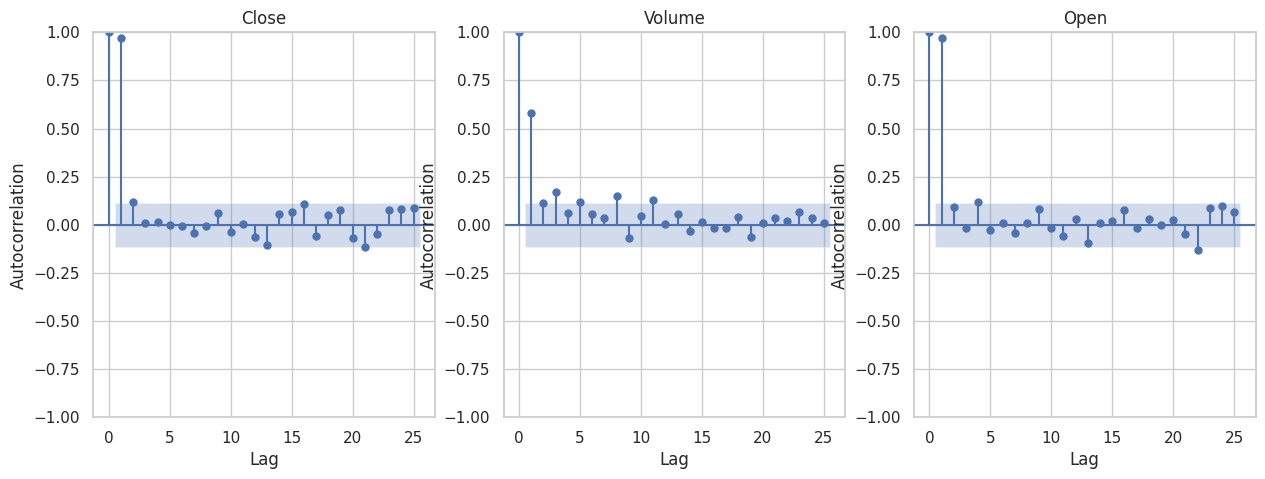

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Setting the figure size for the plots
plt.figure(figsize=(15, 5))

# Plotting Autocorrelation for 'Close'
plt.subplot(1, 3, 1)
plot_pacf(train_data['Close'], ax=plt.gca(), title='Close')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Plotting Autocorrelation for 'Volume'
plt.subplot(1, 3, 2)
plot_pacf(train_data['Volume'], ax=plt.gca(), title='Volume')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Plotting Autocorrelation for 'Open'
plt.subplot(1, 3, 3)
plot_pacf(train_data['Open'], ax=plt.gca(), title='Open')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Adjusting layout for better readability
plt.show()

This shows high auto correlation at lag 1. This implies close price is dependent on previous close price values

In [11]:
#Feature engineering as there exists auto correlation and linear relationship between open and close

# Creating 2 lagged values for 'Open' and 'Volume'
train_data['Open_lag1'] = train_data['Open'].shift(1)
train_data['Open_lag2'] = train_data['Open'].shift(2)
#train_data['Open_lag3'] = train_data['Open'].shift(3)
#train_data['Close_lag1'] = train_data['Close'].shift(1)
#train_data['Close_lag2'] = train_data['Close'].shift(2)
train_data['Volume_lag1'] = train_data['Volume'].shift(1)
train_data['Volume_lag2'] = train_data['Volume'].shift(2)
train_data['Price_ROC'] = train_data['Open'].pct_change() * 100
train_data['Volume_ROC'] = train_data['Volume'].pct_change() * 100
window = 10  # You can choose the window size
train_data['SMA_Open'] = train_data['Open'].rolling(window=window).mean()
train_data['OBV'] = np.where(train_data['Open'] > train_data['Open'].shift(1), train_data['Volume'], 
                     np.where(train_data['Open'] < train_data['Open'].shift(1), -train_data['Volume'], 0)).cumsum()
train_data['VWMA'] = (train_data['Open'] * train_data['Volume']).rolling(window=window).sum() / train_data['Volume'].rolling(window=window).sum()

# Showing the first few rows to verify
train_data_head_lagged = train_data.head()
train_data_head_lagged


,id,Open,Close,Volume,Strategy,Close_Pct_Change,Open_lag1,Open_lag2,Volume_lag1,Volume_lag2,Price_ROC,Volume_ROC,SMA_Open,OBV,VWMA
Date,,,,,,,,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2015-06-08,1,64.116235,74.443331,227974800,Hold,-1.542980,66.208486,NaN,298506300.0,NaN,-3.160094,-23.628145,NaN,-227974800,NaN
2015-06-15,2,47.701942,71.140831,250670900,Buy,-4.436260,64.116235,66.208486,227974800.0,298506300.0,-25.600838,9.955530,NaN,-478645700,NaN
2015-06-22,3,54.754816,72.881344,223614300,Hold,2.446573,47.701942,64.116235,250670900.0,227974800.0,14.785299,-10.793674,NaN,-255031400,NaN
2015-06-29,4,48.031899,66.284718,406814900,Buy,-9.051186,54.754816,47.701942,223614300.0,250670900.0,-12.278220,81.927050,NaN,-661846300,NaN


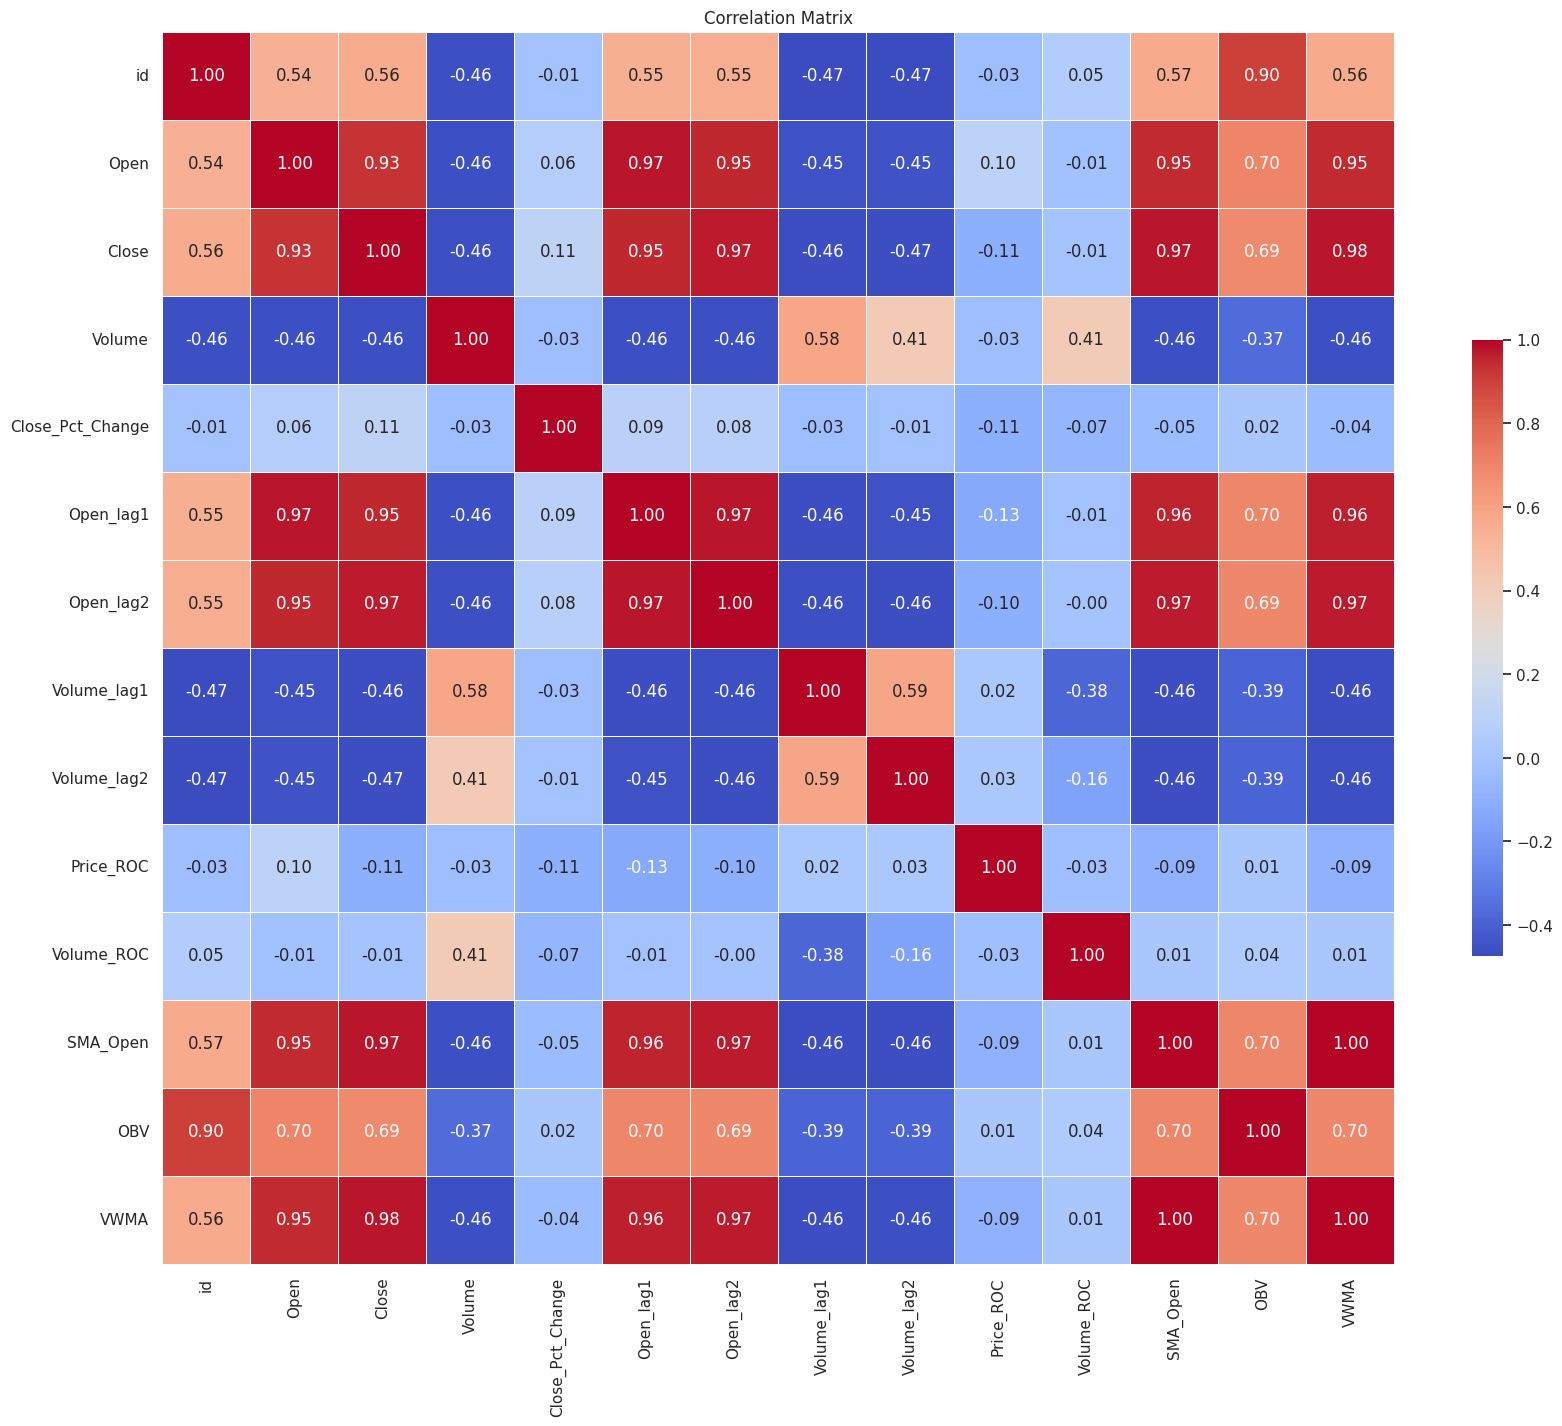

In [12]:
import seaborn as sns

# Calculating the correlation matrix
correlation_matrix = train_data.drop(columns=['Strategy']).corr()

# Setting up the matplotlib figure
plt.figure(figsize=(20, 16))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.show()


Close price has high correlation with open

In [13]:
train_data = train_data.dropna()
train_data.head()

,id,Open,Close,Volume,Strategy,Close_Pct_Change,Open_lag1,Open_lag2,Volume_lag1,Volume_lag2,Price_ROC,Volume_ROC,SMA_Open,OBV,VWMA
Date,,,,,,,,,,,,,,,
2015-08-03,9,47.101190,55.975242,294538600,Buy,-0.689171,49.402806,45.200332,288132300.0,326224700.0,-4.658878,2.223388,51.974348,-1097190100,50.857028
2015-08-10,10,43.727277,54.522764,225627700,Buy,-2.594859,47.101190,49.402806,294538600.0,288132300.0,-7.163116,-23.396220,49.726227,-1322817800,49.102172
2015-08-17,11,51.497676,55.846273,274069600,Buy,2.427444,43.727277,47.101190,225627700.0,294538600.0,17.770141,21.469837,48.464371,-1048748200,48.328194
2015-08-24,12,58.525817,53.890542,328151900,Buy,-3.501991,51.497676,43.727277,274069600.0,225627700.0,13.647492,19.733053,49.546759,-720596300,49.287595
2015-08-31,13,61.833756,51.540116,272386700,Buy,-4.361481,58.525817,51.497676,328151900.0,274069600.0,5.652103,-16.993715,50.254653,-448209600,49.880740


In [14]:
features = ['Open', 'Volume', 'Open_lag1', 'Open_lag2','SMA_Open','VWMA']
train_df = train_data[features].dropna()
train_df.head()
target = train_data['Close']

train_scaled = train_df

In [15]:
# Splitting the dataset into train and test sets (80-20 split)
split_index = int(len(train_scaled) * 0.8)
train_set = train_scaled[:split_index]
train_target = target[:split_index]
test_set = train_scaled[split_index:]
test_target = target[split_index:]

# Showing the shape of the train and test sets
train_set_shape = train_set.shape
test_set_shape = test_set.shape

train_set_shape, test_set_shape

((232, 6), (59, 6))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Multiple Linear Regression model
model = LinearRegression()

# Training the model
model.fit(train_set, train_target)

# Making predictions on the test set
y_pred = model.predict(test_set)

# Calculating the Mean Squared Error and R^2 Score
mse = mean_squared_error(test_target, y_pred)
r2 = r2_score(test_target, y_pred)

print("mse: ",mse)
print("R squared: ",r2)

smape = np.mean(np.abs(y_pred - test_target) / (np.abs(y_pred) + np.abs(test_target)))
print("smape: ",smape)

mse:  5.972189285729032
R squared:  0.46475928158887436
smape:  0.011976394122374535


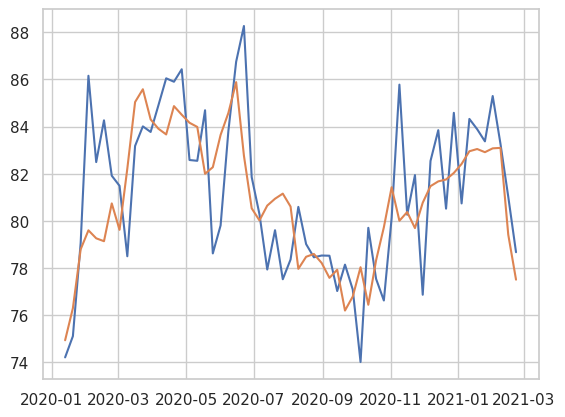

In [17]:
df1 = test_target.to_frame()
df1['Predicted'] = y_pred

import matplotlib.pyplot as plt

plt.plot(df1.index, df1["Close"])
plt.plot(df1.index, df1["Predicted"])
plt.show()

In [18]:
encoding_dict = {
    'Buy': 0,
    'Hold': 1,
    'Sell': 2
}

train_data['Strategy'] = train_data['Strategy'].replace(encoding_dict)

In [19]:
train_data = train_data.dropna()
train_data.head(20)

,id,Open,Close,Volume,Strategy,Close_Pct_Change,Open_lag1,Open_lag2,Volume_lag1,Volume_lag2,Price_ROC,Volume_ROC,SMA_Open,OBV,VWMA
Date,,,,,,,,,,,,,,,
2015-08-03,9,47.101190,55.975242,294538600,0,-0.689171,49.402806,45.200332,288132300.0,326224700.0,-4.658878,2.223388,51.974348,-1097190100,50.857028
2015-08-10,10,43.727277,54.522764,225627700,0,-2.594859,47.101190,49.402806,294538600.0,288132300.0,-7.163116,-23.396220,49.726227,-1322817800,49.102172
2015-08-17,11,51.497676,55.846273,274069600,0,2.427444,43.727277,47.101190,225627700.0,294538600.0,17.770141,21.469837,48.464371,-1048748200,48.328194
2015-08-24,12,58.525817,53.890542,328151900,0,-3.501991,51.497676,43.727277,274069600.0,225627700.0,13.647492,19.733053,49.546759,-720596300,49.287595
2015-08-31,13,61.833756,51.540116,272386700,0,-4.361481,58.525817,51.497676,328151900.0,274069600.0,5.652103,-16.993715,50.254653,-448209600,49.880740
2015-09-07,14,56.326397,56.777579,447136100,1,10.161914,61.833756,58.525817,272386700.0,328151900.0,-8.906719,64.154894,51.084103,-895345700,50.852277
2015-09-14,15,52.248914,61.065344,316464700,1,7.551864,56.326397,61.833756,447136100.0,272386700.0,-7.239028,-29.224077,51.171554,-1211810400,50.890787
2015-09-21,16,54.227949,64.600725,338811600,1,5.789505,52.248914,56.326397,316464700.0,447136100.0,3.787706,7.061419,52.009211,-872998800,52.377462
2015-09-28,17,47.522017,64.788118,498604400,1,0.290078,54.227949,52.248914,338811600.0,316464700.0,-12.366191,47.162730,52.241380,-1371603200,52.353226


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(train_data[['Open','Close', 'Volume', 'Price_ROC', 'Volume_ROC', 'SMA_Open', 'OBV', 'VWMA']])
y_train=train_data['Strategy']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [22]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize individual classifiers with hyperparameter tuning
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
svm_classifier = SVC(C=10, kernel='rbf', probability=True)
logistic_classifier = LogisticRegression(C=1.0)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
xgboost_classifier = XGBClassifier(max_depth=4, n_estimators=500, reg_lambda=0.5)


ensemble_classifier = VotingClassifier(estimators=[('KNN',knn_classifier),('XGBoost',xgboost_classifier),('logistic',logistic_classifier),('RFC',rf_classifier),('SCV',svm_classifier)], voting='soft')  # 'soft' for weighted voting based on probabilities

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = ensemble_classifier.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.5f}")

Validation Accuracy: 0.98305


In [23]:
file_path1 = '/kaggle/input/ue21cs342aa2/test.csv'
test_data = pd.read_csv(file_path1)

test_data['Date'] = pd.to_datetime(test_data['Date'])

# Set 'Date' as index
test_data.set_index('Date', inplace=True)
test_data.head()
train_data.tail()

,id,Open,Close,Volume,Strategy,Close_Pct_Change,Open_lag1,Open_lag2,Volume_lag1,Volume_lag2,Price_ROC,Volume_ROC,SMA_Open,OBV,VWMA
Date,,,,,,,,,,,,,,,
2021-01-25,295,81.284821,83.373498,117281600,2,-0.615394,80.663736,79.840215,127248000.0,152163700.0,0.769968,-7.832265,79.975059,3468217200,79.983961
2021-02-01,296,71.970249,85.294903,177655800,2,2.304575,81.284821,80.663736,117281600.0,127248000.0,-11.459177,51.477981,79.283808,3290561400,79.193706
2021-02-08,297,71.784627,83.266453,146003500,1,-2.378161,71.970249,81.284821,177655800.0,117281600.0,-0.257915,-17.816643,78.588058,3144557900,78.586359
2021-02-15,298,69.372333,81.026827,167762500,1,-2.689709,71.784627,71.970249,146003500.0,177655800.0,-3.360461,14.903067,77.670184,2976795400,77.651822
2021-02-22,299,69.618620,78.672007,332979200,1,-2.906222,69.372333,71.784627,167762500.0,146003500.0,0.355022,98.482498,76.666528,3309774600,75.893553


In [24]:
combine_train = train_data.loc[:, ['id', 'Open', 'Volume']]
combined = pd.concat([combine_train,test_data])
combined

,id,Open,Volume
Date,,,
2015-08-03,9,47.101190,294538600
2015-08-10,10,43.727277,225627700
2015-08-17,11,51.497676,274069600
2015-08-24,12,58.525817,328151900
2015-08-31,13,61.833756,272386700
...,...,...,...
2022-12-26,95,57.048622,224994700
2023-01-02,96,60.569661,176020500
2023-01-09,97,61.446777,181478600


In [25]:
combined['Open_lag1'] = combined['Open'].shift(1)
combined['Open_lag2'] = combined['Open'].shift(2)
combined['Volume_lag1'] = combined['Volume'].shift(1)
combined['Volume_lag2'] = combined['Volume'].shift(2)
combined['Price_ROC'] = combined['Open'].pct_change() * 100
combined['Volume_ROC'] = combined['Volume'].pct_change() * 100
window = 10  # You can choose the window size
combined['SMA_Open'] = combined['Open'].rolling(window=window).mean()
combined['OBV'] = np.where(combined['Open'] > combined['Open'].shift(1), combined['Volume'], 
                     np.where(combined['Open'] < combined['Open'].shift(1), -combined['Volume'], 0)).cumsum()
combined['VWMA'] = (combined['Open'] * combined['Volume']).rolling(window=window).sum() / combined['Volume'].rolling(window=window).sum()

combined.head(10)

,id,Open,Volume,Open_lag1,Open_lag2,Volume_lag1,Volume_lag2,Price_ROC,Volume_ROC,SMA_Open,OBV,VWMA
Date,,,,,,,,,,,,
2015-08-03,9,47.101190,294538600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2015-08-10,10,43.727277,225627700,47.101190,NaN,294538600.0,NaN,-7.163116,-23.396220,NaN,-225627700,NaN
2015-08-17,11,51.497676,274069600,43.727277,47.101190,225627700.0,294538600.0,17.770141,21.469837,NaN,48441900,NaN
2015-08-24,12,58.525817,328151900,51.497676,43.727277,274069600.0,225627700.0,13.647492,19.733053,NaN,376593800,NaN
2015-08-31,13,61.833756,272386700,58.525817,51.497676,328151900.0,274069600.0,5.652103,-16.993715,NaN,648980500,NaN
2015-09-07,14,56.326397,447136100,61.833756,58.525817,272386700.0,328151900.0,-8.906719,64.154894,NaN,201844400,NaN
2015-09-14,15,52.248914,316464700,56.326397,61.833756,447136100.0,272386700.0,-7.239028,-29.224077,NaN,-114620300,NaN
2015-09-21,16,54.227949,338811600,52.248914,56.326397,316464700.0,447136100.0,3.787706,7.061419,NaN,224191300,NaN
2015-09-28,17,47.522017,498604400,54.227949,52.248914,338811600.0,316464700.0,-12.366191,47.162730,NaN,-274413100,NaN


In [26]:
testing_df12 = combined.tail(len(test_data))
testing_df12.head()


,id,Open,Volume,Open_lag1,Open_lag2,Volume_lag1,Volume_lag2,Price_ROC,Volume_ROC,SMA_Open,OBV,VWMA
Date,,,,,,,,,,,,
2021-03-01,0,72.708331,205897600,69.618620,69.372333,332979200.0,167762500.0,4.438053,-38.165027,75.901181,4612862300,75.187029
2021-03-08,1,73.310886,214095600,72.708331,69.618620,205897600.0,332979200.0,0.828729,3.981591,75.104431,4826957900,74.295110
2021-03-15,2,70.610119,151601700,73.310886,72.708331,214095600.0,205897600.0,-3.683991,-29.189717,74.116394,4675356200,73.299536
2021-03-22,3,70.256017,193982500,70.610119,73.310886,151601700.0,214095600.0,-0.501490,27.955359,73.157974,4481373700,72.435193
2021-03-29,4,68.258324,220238400,70.256017,70.610119,193982500.0,151601700.0,-2.843447,13.535190,71.917433,4261135300,71.414714


In [27]:
id_df = testing_df12['id']
id_df = id_df.to_frame()
id_df

,id
Date,
2021-03-01,0
2021-03-08,1
2021-03-15,2
2021-03-22,3
2021-03-29,4
...,...
2022-12-26,95
2023-01-02,96
2023-01-09,97


In [28]:
testing_df12 = testing_df12.drop(['id','Volume_lag1', 'Volume_lag2', 'Price_ROC', 'Volume_ROC', 'OBV' ], axis=1)
testing_df12

,Open,Volume,Open_lag1,Open_lag2,SMA_Open,VWMA
Date,,,,,,
2021-03-01,72.708331,205897600,69.618620,69.372333,75.901181,75.187029
2021-03-08,73.310886,214095600,72.708331,69.618620,75.104431,74.295110
2021-03-15,70.610119,151601700,73.310886,72.708331,74.116394,73.299536
2021-03-22,70.256017,193982500,70.610119,73.310886,73.157974,72.435193
2021-03-29,68.258324,220238400,70.256017,70.610119,71.917433,71.414714
...,...,...,...,...,...,...
2022-12-26,57.048622,224994700,55.184092,58.417757,55.983869,56.082875
2023-01-02,60.569661,176020500,57.048622,55.184092,56.460472,56.462970
2023-01-09,61.446777,181478600,60.569661,57.048622,57.392352,57.235692


In [29]:
testing_pred = model.predict(testing_df12)
testing_pred

array([76.2806526 , 75.72525954, 76.41847661, 76.21281626, 74.97749458,
       74.6756137 , 73.92464125, 74.43181609, 75.2965782 , 75.25011408,
       74.54969015, 73.85777922, 74.85611613, 74.55937636, 76.36630332,
       76.13638936, 76.20533663, 75.08673713, 73.60878604, 73.47383974,
       74.78974748, 75.14708397, 76.36248249, 77.17680723, 78.26176079,
       79.25239268, 79.05871044, 80.9953683 , 81.95248879, 81.27534351,
       83.15188229, 81.76910306, 82.60506956, 82.62448784, 84.29364338,
       83.98175381, 84.83996139, 86.12184716, 84.6545704 , 88.8803302 ,
       89.0234247 , 84.09784101, 81.09589652, 78.67728665, 76.8189718 ,
       74.96994113, 74.92963228, 72.27261344, 74.29408794, 75.63237598,
       74.81423859, 75.04024926, 76.82114135, 76.6523537 , 75.73899525,
       80.780023  , 80.37393854, 79.98980773, 80.14063391, 81.02204249,
       81.93016767, 83.68016352, 83.06765311, 82.14720189, 79.42039893,
       79.47147275, 79.49001931, 77.76793641, 75.66113745, 73.31

In [30]:
id_df['Close'] = testing_pred
id_df

,id,Close
Date,,
2021-03-01,0,76.280653
2021-03-08,1,75.725260
2021-03-15,2,76.418477
2021-03-22,3,76.212816
2021-03-29,4,74.977495
...,...,...
2022-12-26,95,63.214823
2023-01-02,96,62.077637
2023-01-09,97,62.956448


In [31]:
import warnings 
warnings.filterwarnings('ignore')
testing_df13 = combined.tail(len(test_data))
testing_df13['Close'] = testing_pred
testing_df13.head()

,id,Open,Volume,Open_lag1,Open_lag2,Volume_lag1,Volume_lag2,Price_ROC,Volume_ROC,SMA_Open,OBV,VWMA,Close
Date,,,,,,,,,,,,,
2021-03-01,0,72.708331,205897600,69.618620,69.372333,332979200.0,167762500.0,4.438053,-38.165027,75.901181,4612862300,75.187029,76.280653
2021-03-08,1,73.310886,214095600,72.708331,69.618620,205897600.0,332979200.0,0.828729,3.981591,75.104431,4826957900,74.295110,75.725260
2021-03-15,2,70.610119,151601700,73.310886,72.708331,214095600.0,205897600.0,-3.683991,-29.189717,74.116394,4675356200,73.299536,76.418477
2021-03-22,3,70.256017,193982500,70.610119,73.310886,151601700.0,214095600.0,-0.501490,27.955359,73.157974,4481373700,72.435193,76.212816
2021-03-29,4,68.258324,220238400,70.256017,70.610119,193982500.0,151601700.0,-2.843447,13.535190,71.917433,4261135300,71.414714,74.977495


In [32]:
ftr = ['Open', 'Close', 'Volume', 'Price_ROC', 'Volume_ROC', 'SMA_Open', 'OBV', 'VWMA']
testing_dfst = scaler.fit_transform(testing_df13[ftr])
id_df = id_df.dropna()
id_df

,id,Close
Date,,
2021-03-01,0,76.280653
2021-03-08,1,75.725260
2021-03-15,2,76.418477
2021-03-22,3,76.212816
2021-03-29,4,74.977495
...,...,...
2022-12-26,95,63.214823
2023-01-02,96,62.077637
2023-01-09,97,62.956448


In [33]:
strat = ensemble_classifier.predict(testing_dfst)
strat

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
id_df['Strategy'] = strat

In [35]:
encoding_dict_reverse = {
    0 : 'Buy',
    1 : 'Hold',
    2 : 'Sell'
}

id_df['Strategy'] = id_df['Strategy'].replace(encoding_dict_reverse)

In [36]:
submission_df = pd.DataFrame({'id': id_df.id, 'Date': id_df.index, 'Close': id_df.Close, 'Strategy': id_df.Strategy})


In [37]:
submission_df = submission_df.reset_index(drop=True)
submission_df.to_csv('BR_2_504_565_587.csv', index=False)